# Statistical Analysis - Blue Side vs. Red Side

## Michael Phillips

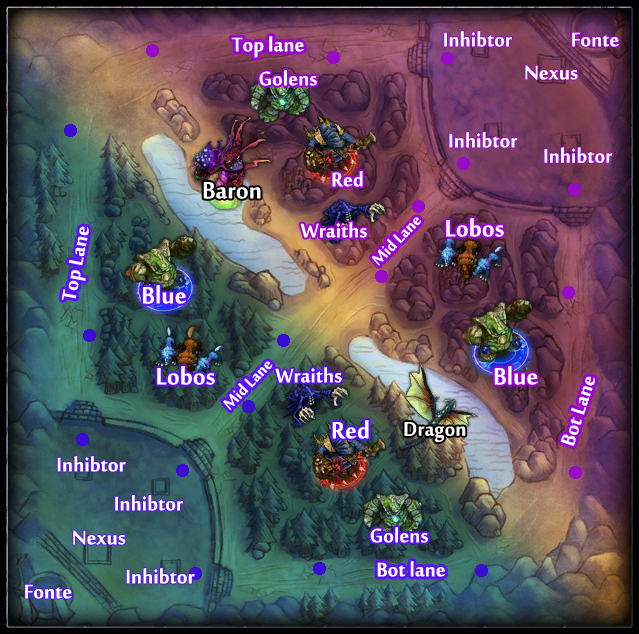

In [4]:
from IPython.display import Image
Image('bluered.png') 

The picture displayed above shows the game map for League of Legends. The river down the middle divides red side from blue side. There has been a long-standing belief amongst most people who play or watch the game that blue side has an inherent advantage due to the isometric viewpoint the game uses. 

To test this theory I want to look at average kda ratios for blue side teams and red side teams. If blue really does have an advantage, the average kda should be higher for that side.

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import statsmodels.api as sm
%matplotlib inline

C:\Users\Mike\Anaconda2\envs\py3DataScience\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Hypothesis Test:

Null hypothesis: there is no difference between average kda for red and blue side.

Alternative hypothesis: blue side kda minus red side kda will be greater than 0.

Alpha level is 0.05.

In [40]:
df = pd.read_csv('team_kda.csv', index_col=0)

In [12]:
tk_df = pd.read_csv('team_kda.csv', index_col=0)
#tk_pt = pd.pivot_table(tk_df, index=['team_name'], values=['kda_ratio'], aggfunc=np.mean).reset_index().sort_values(by='kda_ratio')
tk_df.head()

,match_id,red_or_blue_side,team_name,kills,deaths,assists,kda_ratio
0,001a1f289e3bab22,Blue,ANC,10.0,23.0,24.0,1.478261
1,001a1f289e3bab22,Red,CJE,23.0,10.0,56.0,7.900000
2,001f50c8547e2e73,Blue,EDG,28.0,10.0,60.0,8.800000
3,001f50c8547e2e73,Red,AHQ,10.0,28.0,23.0,1.178571
4,002f613ae09ad421,Blue,TPA,13.0,0.0,30.0,43.000000


In [98]:
df = df[['red_or_blue_side', 'kda_ratio']]
dfb = df.loc[df['red_or_blue_side']=='Blue','kda_ratio']
dfr = df.loc[df['red_or_blue_side']=='Red','kda_ratio']
print("The standard deviation for blue side is %.3f." % dfb.std())
print("The standard deviation for red side is %.3f." % dfr.std())
print("The mean for blue side is %.3f." % dfb.mean())
print("The mean for red side is %.3f." % dfr.mean())

The standard deviation for blue side is 9.075.
The standard deviation for red side is 8.202.
The mean for blue side is 7.067.
The mean for red side is 5.925.


I'm going to use the data I have as a proxy for the entire population of LoL games. Since the standard deviations were different, and I have two independent samples I will use the independent t-test. 

In [97]:
tstat, pvalue, dfree = sm.stats.ttest_ind(dfb, dfr, alternative='larger', usevar='unequal')
print("The calculated t-statistic is %.3f." % tstat)
print("The calculated p-value is %.3f." % pvalue)

The calculated t-statistic is 5.718.
The calculated p-value is 0.000.


The p-value for the test was very close to zero, certainly less than the alpha level of 0.05. We can say in this case that the observed difference in average kda for blue and red sides **is** statistically significant. 

Statistical significance for a test like this is interesting because there is no clear explanation for **why** this difference is observable. I mentioned the isometric viewpoint above and that is one possibility but it doesn't explain what it is about the shift in viewpoint that causes one side to perform so much better than the other.

For this project, I (mostly) chose to not engage in this debate as I don't believe you can answer this question with the data alone. Psychological analysis, or deeper engagement with visual/cognitive science is where I think the answer truly lies.